In [1]:
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import cifar10

NUM_CLASSES = 10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

input_shape = X_train.shape[1:]

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

inputs = Input(shape=input_shape)

conv = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')
x = conv(inputs)
x = BatchNormalization()(x)

conv = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',
              kernel_regularizer=l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              kernel_regularizer=l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              activation='relu',
              kernel_regularizer=l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              kernel_regularizer=l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

x = AveragePooling2D(pool_size=8)(x)
y = Flatten()(x)

y = Dense(512, activation='relu')(y)
outputs = Dense(NUM_CLASSES, activation='softmax')(y)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

x_train shape: (50000, 32, 32, 3)
50000 train samples


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 32, 32, 32)        │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 32, 32, 32)        │             128 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 32, 32, 32)        │           9,248 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 32, 32, 32)        │             128 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 32, 32, 32)        │           9,248 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 32, 32, 32)        │             128 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 32, 32, 32)        │               0 │ batch_normalization[0][0], │
│                               │                           │                 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 32, 32, 32)        │               0 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 32, 32, 32)        │           9,248 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 32, 32, 32)        │             128 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 32)        │           9,248 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_4         │ (None, 32, 32, 32)        │             128 │ conv2d_4[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 32, 32, 32)        │               0 │ activation[0][0],          │
│                               │                           │               

 Total params: 306,314 (1.17 MB)

 Trainable params: 305,994 (1.17 MB)

 Non-trainable params: 320 (1.25 KB)

In [2]:
import os

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

EPOCHS = 40
BATCH_SIZE = 200

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_model-{epoch:03d}-{val_accuracy:.4f}.keras'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 90:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 60:
        lr *= 1e-2
    elif epoch > 40:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

my_callbacks = [checkpoint, lr_scheduler]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    callbacks=my_callbacks)

Learning rate:  0.001
Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4216 - loss: 1.6245
Epoch 1: val_accuracy improved from -inf to 0.14050, saving model to C:\Users\user\ai-main\ai-main\saved_models\cifar10_model-001-0.1405.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 118ms/step - accuracy: 0.4220 - loss: 1.6234 - val_accuracy: 0.1405 - val_loss: 3.0987 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6551 - loss: 0.9861
Epoch 2: val_accuracy improved from 0.14050 to 0.55680, saving model to C:\Users\user\ai-main\ai-main\saved_models\cifar10_model-002-0.5568.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.6552 - loss: 0.9860 - val_accuracy: 0.5568 - val_loss: 1.2851 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7129 - loss: 0.8397
Epoch 3: val_accuracy improved from 0.55680 to 0.69760, saving model to C:\Users\user\ai-main

In [3]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7790 - loss: 1.3235
Test loss: 1.3097105026245117
Test accuracy: 0.7760999798774719


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


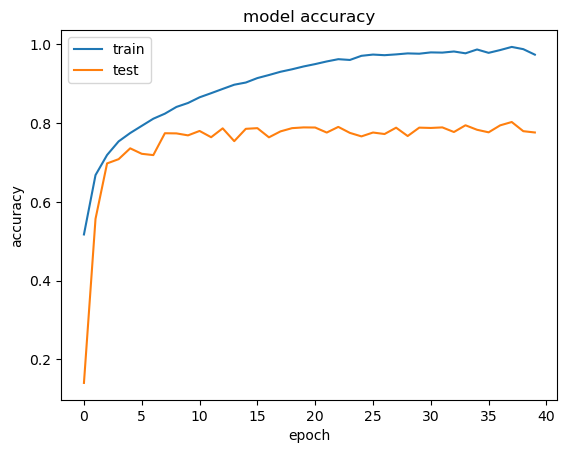

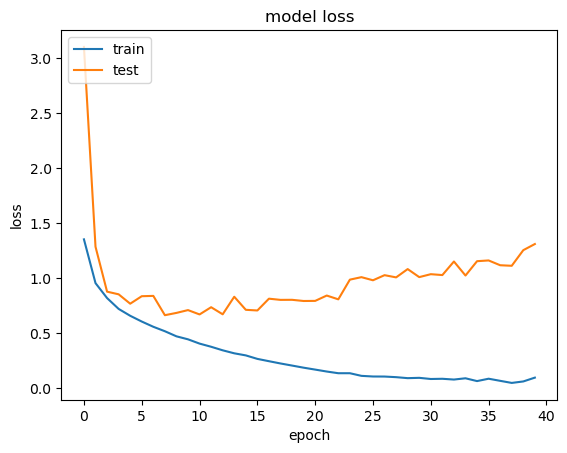

In [4]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()